# Regression

a) First, get familiar with the dataset and prepare it for modeling (by using Python code 
for the following tasks): 

• Check for missing values. 

• Compute the correlations between the attributes and analyze possible dependencies of the data by visualizing the correlations. 

b) Next, suppose you are a housing expert that has additional information to add to the 
dataset. 
• All blocks were houses are on average older than 25 years (HouseAge > 25) …
• … and the average number of bedrooms exceeds 3 (AveBedrms > 3) 
• … are most likely inhabited by Hollywood actors.
• Add a categorical attribute HOL to the dataset that expresses this information
• Encode the new attribute in a suitable way, such that it can be used for 
regression.

c) Split the data into a training set and a test set (ratio of 0.8 for training cases).

d) Train a linear regressor with the training data.

e) Analyze the performance of the trained regressor on the training set and the test set. 
Compute the values of Mean Squared Error (MSE), Root Mean Squared Error (RMSE), 
and Mean Absolute Error (MAE) for both sets. How can the MAE values be 
interpreted? Is the regressor overfitting or underfitting?

Missing values:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64
Correlations:
              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
target      0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude    target 

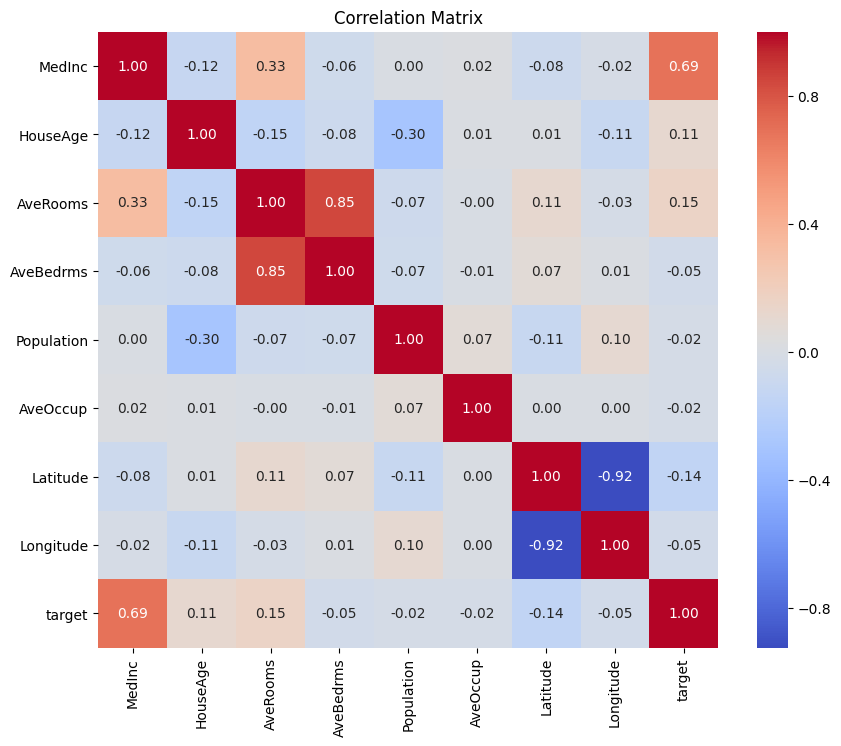

Training MSE: 0.517926370051966, Test MSE: 0.5556861378289394
Training RMSE: 0.7196710151534282, Test RMSE: 0.7454435846051258
Training MAE: 0.5286235651457073, Test MAE: 0.5331406536777423
Mean Absolute Error (MAE) indicates that, on average, the predictions are off by about $533.14 (in thousands of dollars) in the test set.
Overfitting Check: Training Error vs Test Error - 0.7196710151534282 vs 0.7454435846051258


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Load the California housing dataset
housing = fetch_california_housing()
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
housing_df['target'] = housing.target

# Part (a): Data Preparation
# Check for missing values
missing_values = housing_df.isnull().sum()
print(f"Missing values:\n{missing_values}")

# Compute and visualize correlations
correlations = housing_df.corr()
print(f"Correlations:\n{correlations}")

# Visualizing correlation matrix
plt.figure(figsize=(10, 8))
plt.title("Correlation Matrix")
sns.heatmap(correlations, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# Part (b): Add a categorical attribute
housing_df['HOL'] = ((housing_df['HouseAge'] > 25) & (housing_df['AveBedrms'] > 3)).astype(int)

# Part (c): Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    housing_df.drop(columns=['target']), 
    housing_df['target'], 
    test_size=0.20, 
    random_state=42
)

# Part (d): Train a linear regressor
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Part (e): Analyze the performance
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Calculate errors
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Training MSE: {mse_train}, Test MSE: {mse_test}")
print(f"Training RMSE: {rmse_train}, Test RMSE: {rmse_test}")
print(f"Training MAE: {mae_train}, Test MAE: {mae_test}")

# Interpretation of MAE
print(f"Mean Absolute Error (MAE) indicates that, on average, the predictions are off by about ${mae_test * 1000:.2f} (in thousands of dollars) in the test set.")

# Check if the model is overfitting or underfitting
print(f"Overfitting Check: Training Error vs Test Error - {rmse_train} vs {rmse_test}")


# Lasso Regression

A common use case of linear regression models is feature selection. Therefore, the feature 
weights of the trained model are inspected.

a) Load the California housing dataset and split the data into a training and a test set (test 
ratio of 0.2). 

b) Train a Lasso regression model on the training set. Use 𝛼 = 1 as the regularization 
parameter. 

c) Measure the performance of the model on the test set in terms of MAE.

d) Inspect the coefficients of the trained model. Are some equal to zero or close to zero?
What can you do with this information?

e) Remove all features with a coefficient close to zero. Retrain the model and evaluate its 
performance now. Did feature removal yield models with better performance?


In [2]:
from sklearn.linear_model import Lasso

# Part (a): Load the dataset and split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    housing_df.drop(columns=['target']), 
    housing_df['target'], 
    test_size=0.20, 
    random_state=42
)

# Part (b): Train a Lasso regression model with alpha = 1
lasso_regressor = Lasso(alpha=1.0)
lasso_regressor.fit(X_train, y_train)

# Part (c): Measure the performance in terms of MAE
y_test_pred_lasso = lasso_regressor.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
print(f"Lasso Regression Test MAE: {mae_lasso:.2f}")

# Part (d): Inspect coefficients
lasso_coefficients = lasso_regressor.coef_
print(f"Lasso Coefficients:\n{lasso_coefficients}")

# Identify features with coefficients close to zero
significant_features = np.where(np.abs(lasso_coefficients) > 0)[0]
print(f"Significant features indices: {significant_features}")

# Part (e): Remove features with coefficients close to zero and retrain the model
X_train_reduced = X_train.iloc[:, significant_features]
X_test_reduced = X_test.iloc[:, significant_features]

lasso_regressor_reduced = Lasso(alpha=1.0)
lasso_regressor_reduced.fit(X_train_reduced, y_train)

y_test_pred_lasso_reduced = lasso_regressor_reduced.predict(X_test_reduced)
mae_lasso_reduced = mean_absolute_error(y_test, y_test_pred_lasso_reduced)
print(f"Reduced Lasso Regression Test MAE: {mae_lasso_reduced:.2f}")

# Evaluate whether the feature removal improved the performance
if mae_lasso_reduced < mae_lasso:
    print(f"Feature removal improved the performance: MAE reduced from {mae_lasso} to {mae_lasso_reduced}")
else:
    print(f"Feature removal did not improve the performance: MAE increased from {mae_lasso} to {mae_lasso_reduced}")


Lasso Regression Test MAE: 0.76
Lasso Coefficients:
[ 1.48196324e-01  5.72821070e-03  0.00000000e+00 -0.00000000e+00
 -8.16437293e-06 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00]
Significant features indices: [0 1 4]
Reduced Lasso Regression Test MAE: 0.76
Feature removal did not improve the performance: MAE increased from 0.7615782541669575 to 0.7615782541669575
